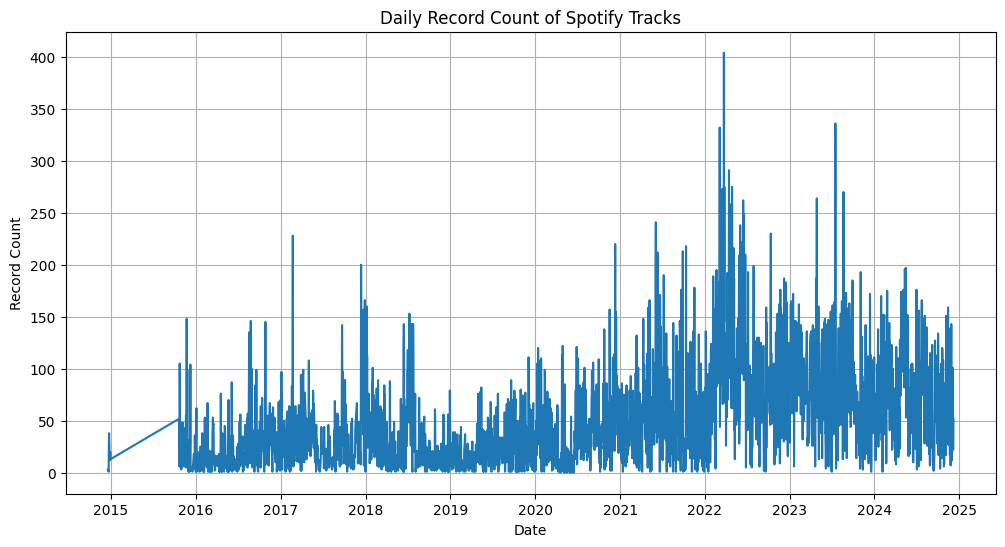

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('history_with_ids.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce') 
df = df.dropna(subset=['Date'])
daily_counts = df.groupby(df['Date'].dt.date)['spotify_track_id'].count()


plt.figure(figsize=(12,6))
daily_counts.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Record Count')
plt.title('Daily Record Count of Spotify Tracks')
plt.grid(True)
plt.show()

/var/folders/b7/q4qn51851rbf8n4823bbcm7r0000gn/T/ipykernel_25839/2306871739.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time']).dt.hour


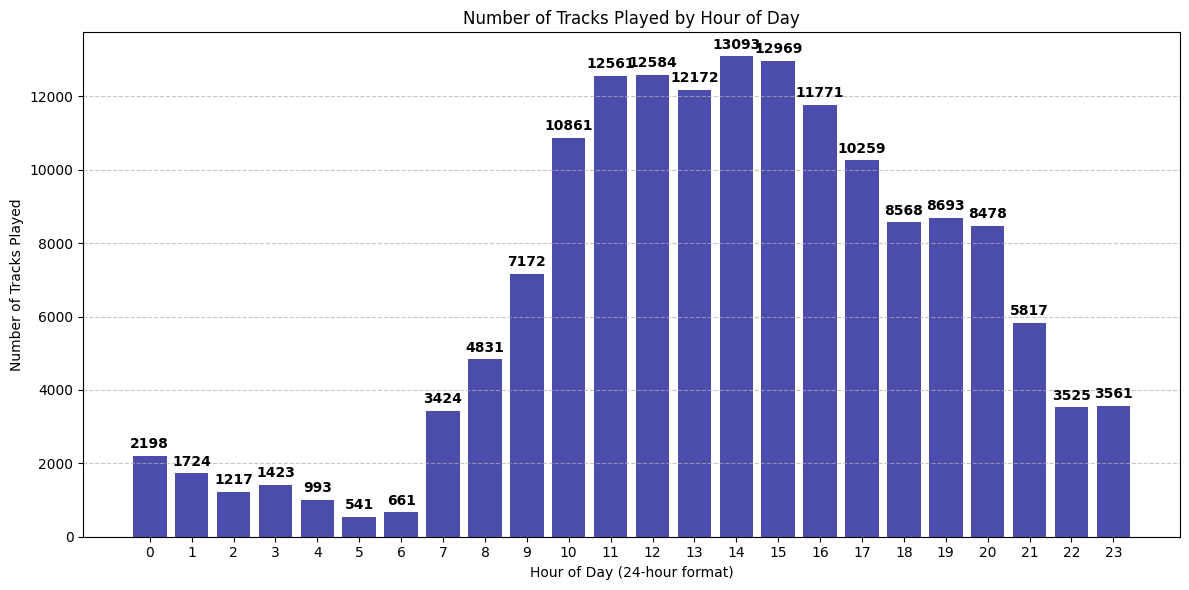

In [3]:

df['Hour'] = pd.to_datetime(df['Time']).dt.hour


hourly_counts = df.groupby('Hour')['spotify_track_id'].count().sort_index()


plt.figure(figsize=(12, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='darkblue', alpha=0.7)
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Number of Tracks Played')
plt.title('Number of Tracks Played by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, count in enumerate(hourly_counts.values):
    plt.text(i, count + max(hourly_counts.values)*0.01, str(count), 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

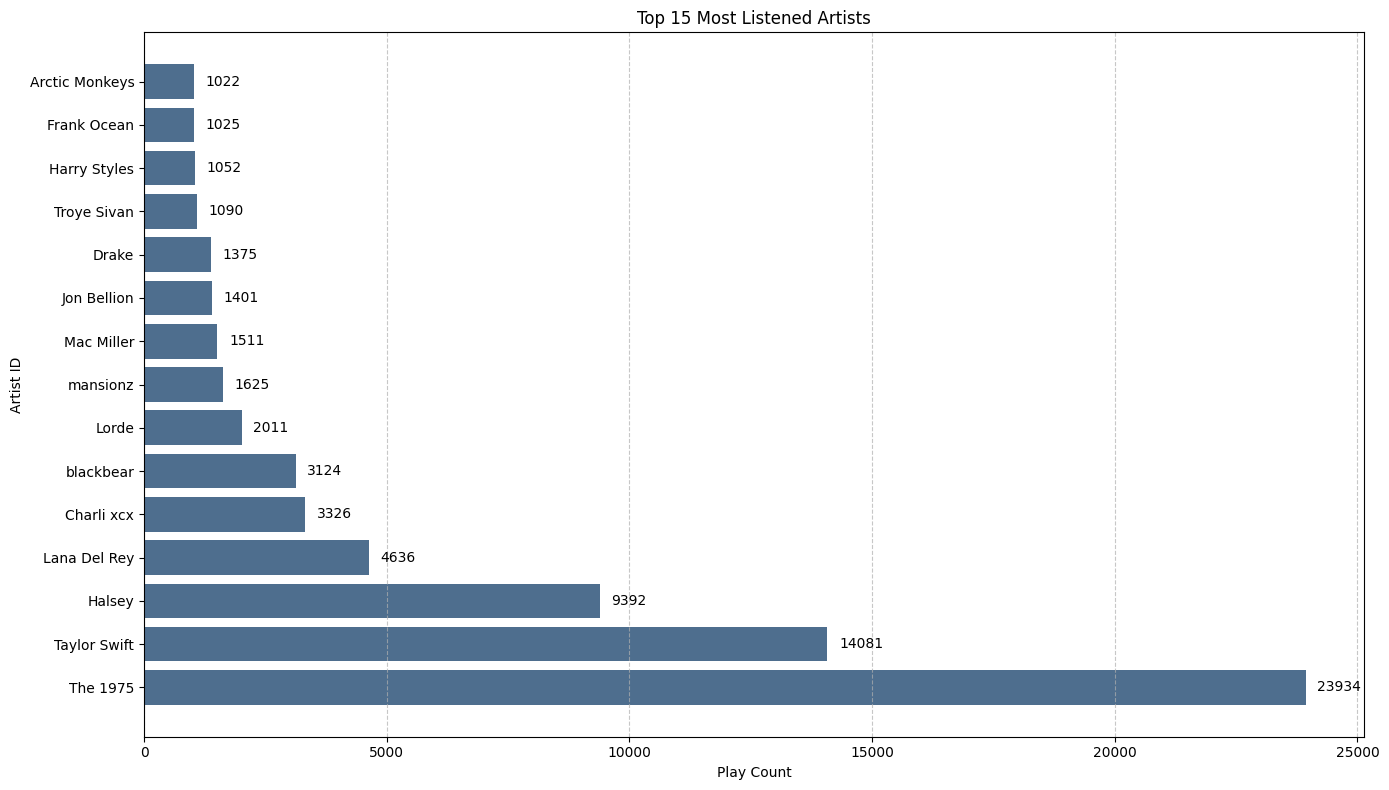

In [12]:

artist_counts = df['Artist'].value_counts().head(15)  # Top 15 artists

plt.figure(figsize=(14, 8))
bars = plt.barh(artist_counts.index, artist_counts.values, color='#03315f', alpha=0.7)
plt.xlabel('Play Count')
plt.ylabel('Artist ID')
plt.title('Top 15 Most Listened Artists')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, bar in enumerate(bars):
    plt.text(bar.get_width() + (max(artist_counts.values)*0.01), 
             bar.get_y() + bar.get_height()/2, 
             f"{artist_counts.values[i]}", 
             va='center')

plt.tight_layout()
plt.show()

Total number of distinct songs played: 16075


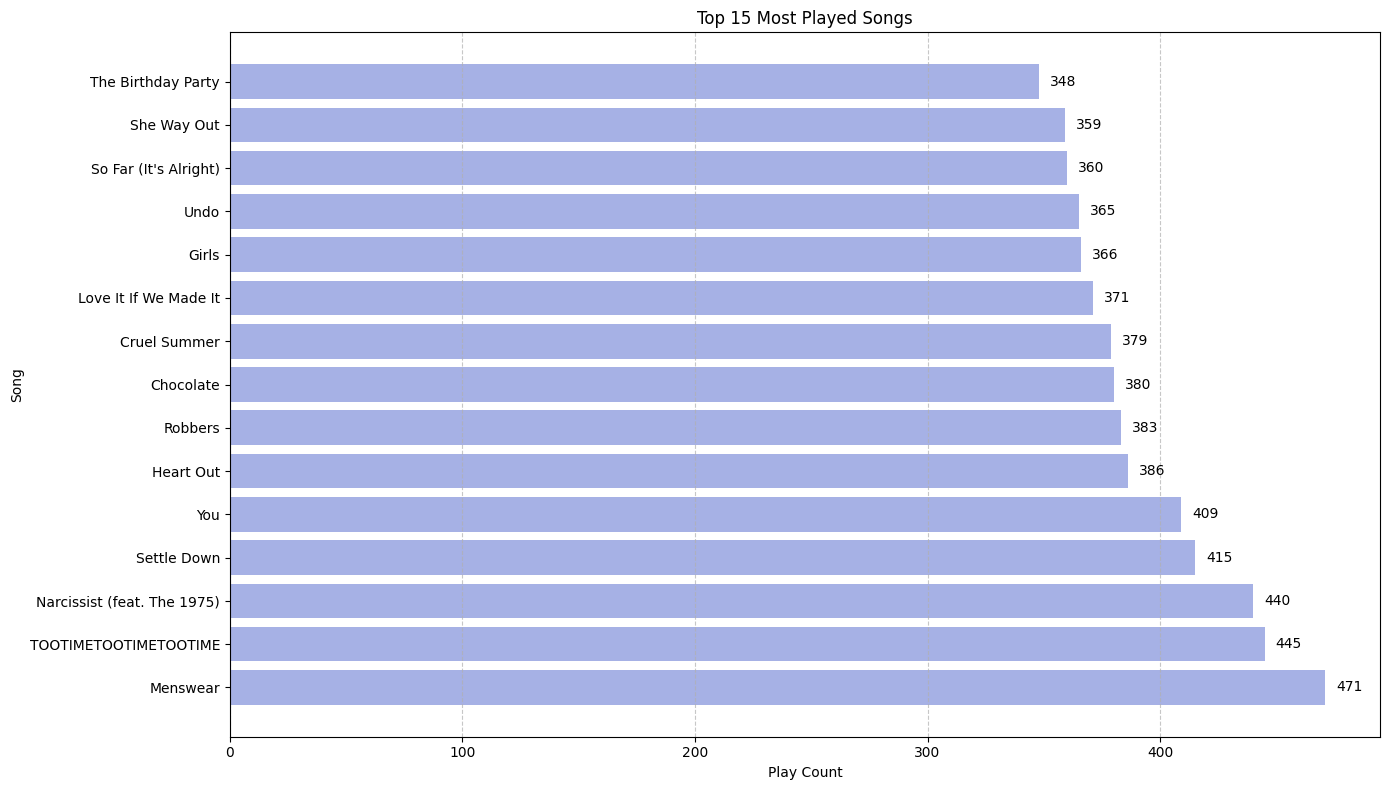

In [11]:

unique_songs = df['spotify_track_id'].nunique()
print(f"Total number of distinct songs played: {unique_songs}")


top_songs = df.groupby(['spotify_track_id', 'Song Name'])['Date'].count().reset_index()
top_songs.columns = ['spotify_track_id', 'Song Name', 'Play Count']
top_songs = top_songs.sort_values('Play Count', ascending=False).head(15)


plt.figure(figsize=(14, 8))
bars = plt.barh(top_songs['Song Name'], top_songs['Play Count'], color='#8191DA', alpha=0.7)
plt.xlabel('Play Count')
plt.ylabel('Song')
plt.title('Top 15 Most Played Songs')
plt.grid(axis='x', linestyle='--', alpha=0.7)


for i, bar in enumerate(bars):
    plt.text(bar.get_width() + (max(top_songs['Play Count'])*0.01), 
             bar.get_y() + bar.get_height()/2, 
             f"{top_songs['Play Count'].iloc[i]}", 
             va='center')


plt.tight_layout()
plt.show()

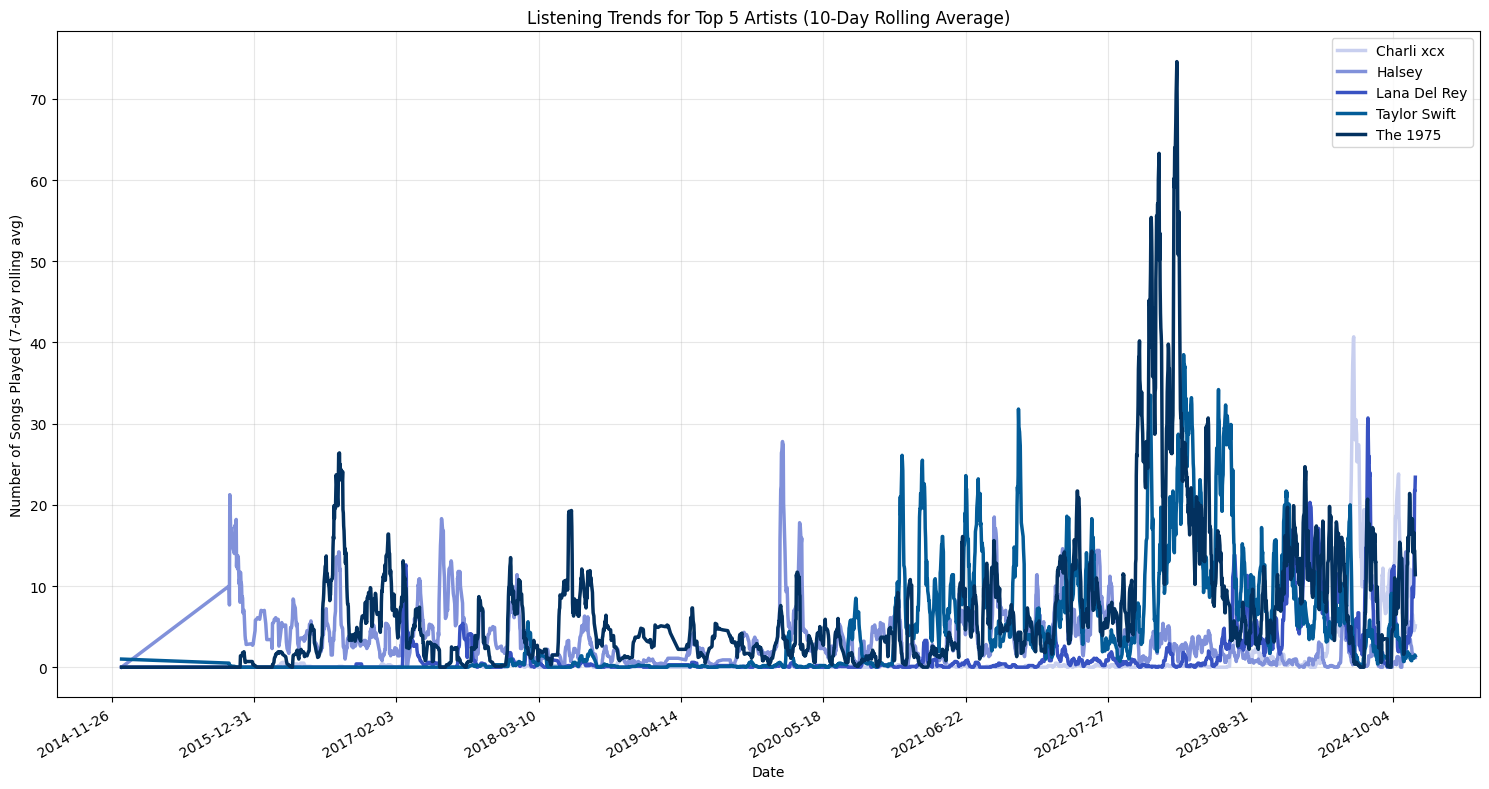

In [10]:

top_artists = df['Artist'].value_counts().nlargest(5).index.tolist()
top_artists_df = df[df['Artist'].isin(top_artists)]
artist_daily = top_artists_df.groupby([top_artists_df['Date'].dt.date, 'Artist'])['spotify_track_id'].count().reset_index()
pivot_df = artist_daily.pivot(index='Date', columns='Artist', values='spotify_track_id').fillna(0)
pivot_df = pivot_df.sort_index()

smooth_df = pivot_df.rolling(window=10, min_periods=1).mean()
plt.figure(figsize=(15, 8))


blue_palette = [
    "#C8CFEF", 
    "#8191DA",  
    "#3852C2",  
    "#035c98",  
    "#03315f"   
]

for i, artist in enumerate(smooth_df.columns):
    plt.plot(
        smooth_df.index,
        smooth_df[artist],
        linewidth=2.5,
        label=artist,
        color=blue_palette[i % len(blue_palette)]
    )

plt.xlabel('Date')
plt.ylabel('Number of Songs Played (7-day rolling avg)')
plt.title('Listening Trends for Top 5 Artists (10-Day Rolling Average)')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.gcf().autofmt_xdate()

plt.tight_layout()
plt.show()